<a href="https://colab.research.google.com/github/Taewan0508/pairs_trading_strategy/blob/main/KO_regress_PEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2307680085.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = "2015-01-01", end = "2025-01-01")
[*********************100%***********************]  2 of 2 completed


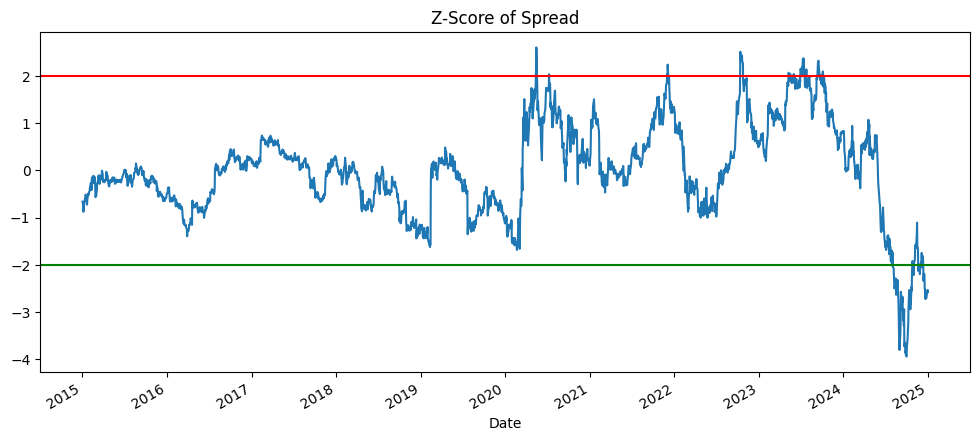

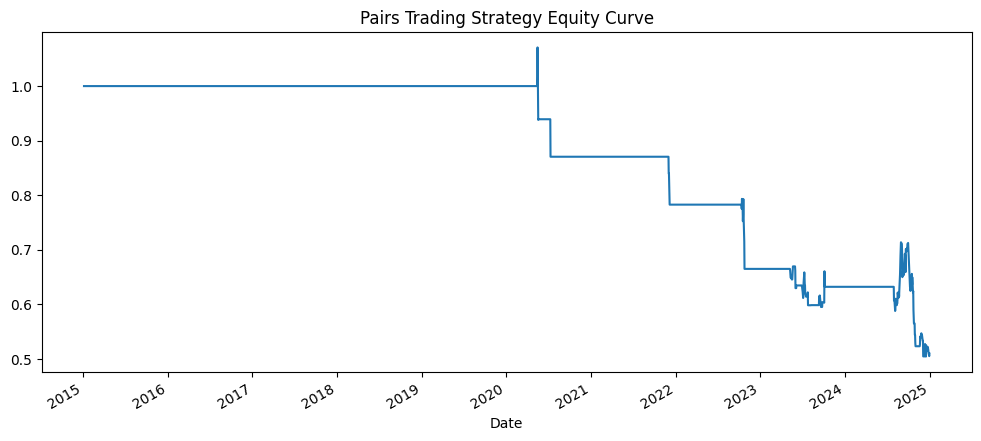

In [ ]:
## When KO (dependent) is regressed on PEP (independent)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

## Download the tickers
tickers = ["KO", "PEP"]
data = yf.download(tickers, start = "2015-01-01", end = "2025-01-01")
data = data["Close"].copy()

## Add hegde ratio (beta) and run the linear regression
## When PEP becomes too high relative to KO, the spread becomes positive
## When KO becomes too low relative to PEP, the spread becomes negative
X = sm.add_constant(data[('KO')])
model = sm.OLS(data[( 'PEP')], X).fit()
beta = model.params[( 'KO')]

## Compute the spread and the z-score
data["spread"] = data[( 'PEP')] - beta * data[( 'KO')]
data["zscore"] = (data["spread"] - data["spread"].mean()) /data["spread"].std()

## Initialize trading signals and trading rules
data["Signal"] = 0
data.loc[data["zscore"] > 2, "Signal"] = 1
data.loc[data["zscore"] < -2, "Signal"] = -1

## Compute the strategy returns
returns = data[( 'PEP')].pct_change() - beta * data[( 'KO')].pct_change()
data["strategy_return"] = returns * data["Signal"].shift(1)

## Plot z-score
data["zscore"].plot(figsize=(12, 5))
plt.axhline(2, color = 'red')
plt.axhline(-2, color = 'green')
plt.title("Z-Score of Spread")
plt.show()

## Plot strategy performance
(1+ data["strategy_return"]).cumprod().plot(figsize=(12, 5))
plt.title("Pairs Trading Strategy Equity Curve")
plt.show()

/tmp/ipython-input-1429804952.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = "2015-01-01", end = "2025-01-01")
[*********************100%***********************]  2 of 2 completed


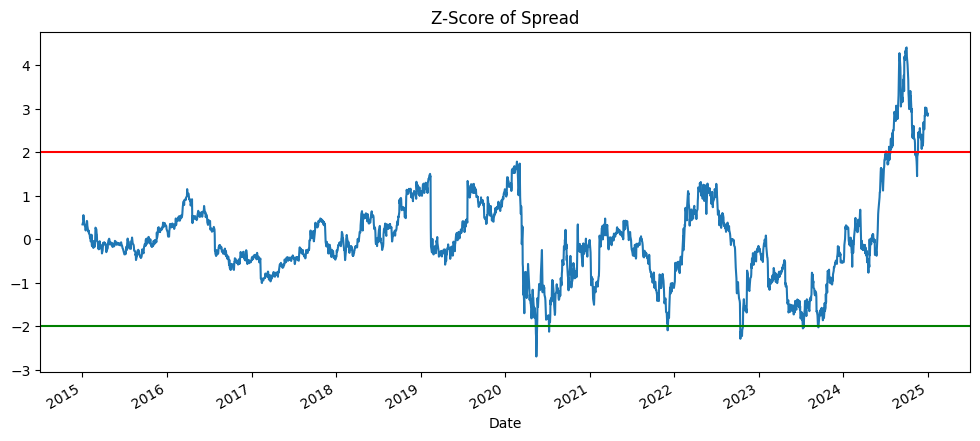

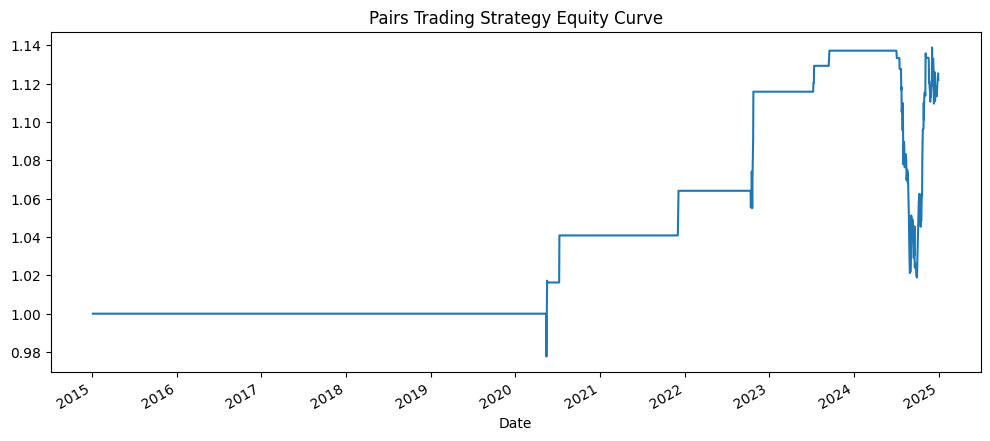

In [1]:
## When PEP (dependent) is regressed on KO (independent)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

## Download the tickers
tickers = ["KO", "PEP"]
data = yf.download(tickers, start = "2015-01-01", end = "2025-01-01")
data = data["Close"].copy()

## Add hegde ratio (beta) and run the linear regression
## When PEP becomes too high relative to KO, the spread becomes positive
## When KO becomes too low relative to PEP, the spread becomes negative
X = sm.add_constant(data[('PEP')])
model = sm.OLS(data[( 'KO')], X).fit()
beta = model.params[( 'PEP')]

## Compute the spread and the z-score
data["spread"] = data[( 'KO')] - beta * data[( 'PEP')]
data["zscore"] = (data["spread"] - data["spread"].mean()) /data["spread"].std()

## Initialize trading signals and trading rules
data["Signal"] = 0
data.loc[data["zscore"] > 2, "Signal"] = -1
data.loc[data["zscore"] < -2, "Signal"] = 1

## Compute the strategy returns
returns = data[( 'KO')].pct_change() - beta * data[( 'PEP')].pct_change()
data["strategy_return"] = returns * data["Signal"].shift(1)

## Plot z-score
data["zscore"].plot(figsize=(12, 5))
plt.axhline(2, color = 'red')
plt.axhline(-2, color = 'green')
plt.title("Z-Score of Spread")
plt.show()

## Plot strategy performance
(1+ data["strategy_return"]).cumprod().plot(figsize=(12, 5))
plt.title("Pairs Trading Strategy Equity Curve")
plt.show()